In [79]:
# %matplotlib notebook

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [81]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\A304_10K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [82]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,9999.970068,10000,9.999736,1679.227229,-1679.158481,1451.436988,-1451.416593,1677.774083,-1677.786242,1452.147422,-1452.035691,4.934000e-07,1000000
1,0.001,9000.262354,9000,10.000000,1679.831673,-1679.732849,1452.407161,-1452.358480,1678.405235,-1678.413460,1453.089954,-1452.933522,4.918000e-07,1000000
2,0.001,8000.309619,8000,10.000000,1680.437592,-1680.355281,1453.327738,-1453.285787,1679.021551,-1679.002159,1453.984728,-1453.835170,4.954000e-07,1000000
3,0.001,7000.452856,7000,10.000052,1681.015517,-1680.943335,1454.239662,-1454.202220,1679.651040,-1679.682597,1454.885903,-1454.698042,5.068000e-07,1000000
4,0.001,6000.237793,6000,10.000069,1681.623451,-1681.526702,1455.131775,-1455.109584,1680.255336,-1680.286329,1455.782673,-1455.651330,5.342000e-07,1000000


In [83]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

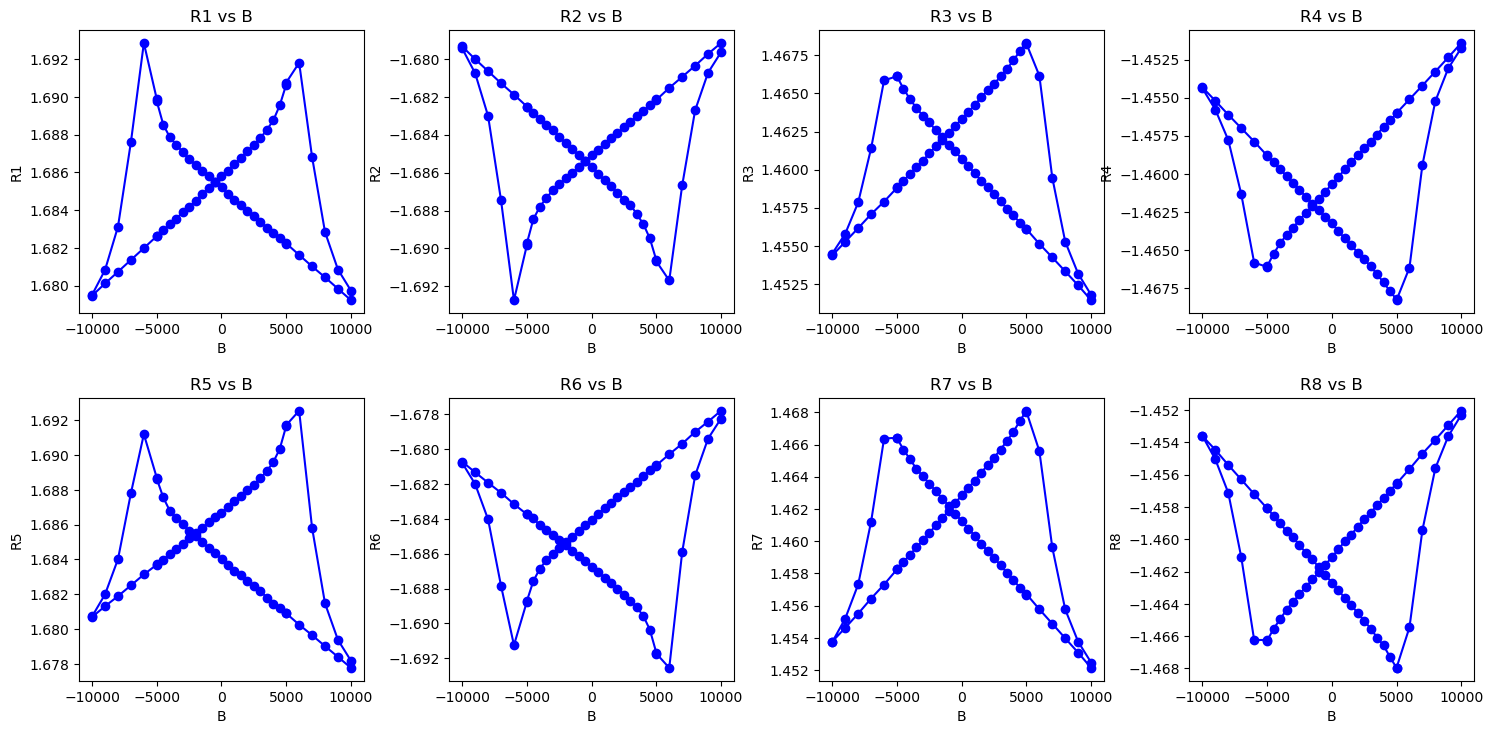

In [84]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [85]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

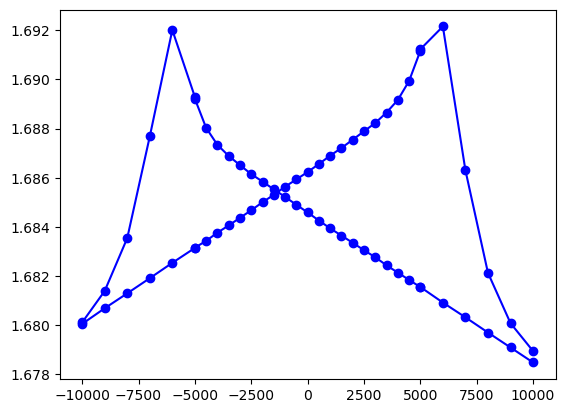

In [86]:
plt.plot(df['B_int'], df['Ra'],'bo-')

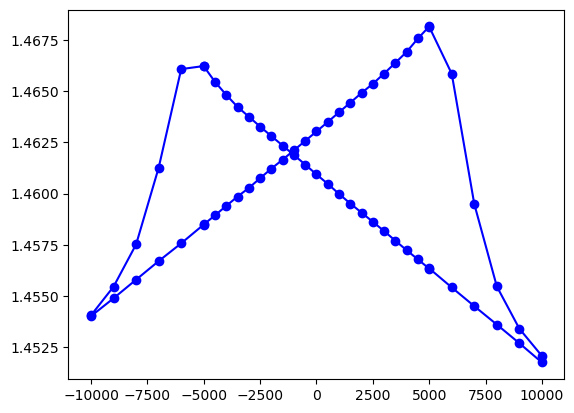

In [87]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

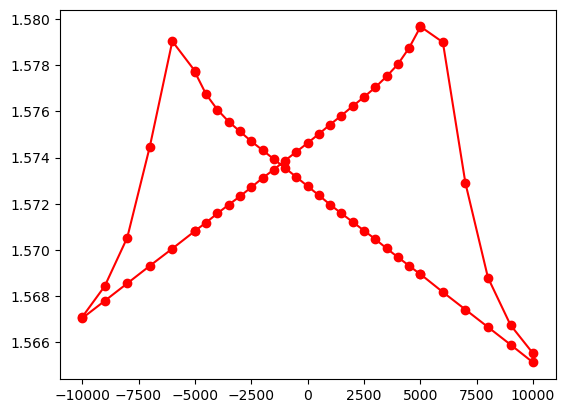

In [88]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [89]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

1.573694274874125

In [90]:
df['MR'] = (df['R'] - R0)/R0*100

In [91]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.544670
1,9000,-0.495505
2,8000,-0.447229
3,7000,-0.399028
4,6000,-0.350982


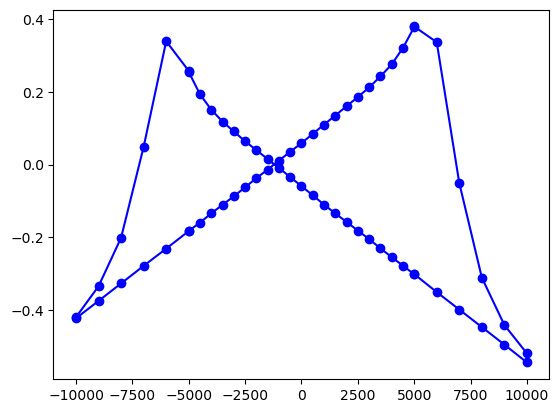

In [92]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [93]:
df.to_pickle('./pickle_data/MR_10K.pkl')

In [94]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,9.999736,1679.227229,-1679.158481,1451.436988,-1451.416593,1677.774083,-1677.786242,...,1.451437,-1.451417,1.677774,-1.677786,1.452147,-1.452036,1.678487,1.451759,1.565123,-0.544670
1,0.001,9000,9000,10.000000,1679.831673,-1679.732849,1452.407161,-1452.358480,1678.405235,-1678.413460,...,1.452407,-1.452358,1.678405,-1.678413,1.453090,-1.452934,1.679096,1.452697,1.565897,-0.495505
2,0.001,8000,8000,10.000000,1680.437592,-1680.355281,1453.327738,-1453.285787,1679.021551,-1679.002159,...,1.453328,-1.453286,1.679022,-1.679002,1.453985,-1.453835,1.679704,1.453608,1.566656,-0.447229
3,0.001,7000,7000,10.000052,1681.015517,-1680.943335,1454.239662,-1454.202220,1679.651040,-1679.682597,...,1.454240,-1.454202,1.679651,-1.679683,1.454886,-1.454698,1.680323,1.454506,1.567415,-0.399028
4,0.001,6000,6000,10.000069,1681.623451,-1681.526702,1455.131775,-1455.109584,1680.255336,-1680.286329,...,1.455132,-1.455110,1.680255,-1.680286,1.455783,-1.455651,1.680923,1.455419,1.568171,-0.350982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000,6000,10.000025,1691.808221,-1691.685250,1466.164033,-1466.147949,1692.544164,-1692.558362,...,1.466164,-1.466148,1.692544,-1.692558,1.465598,-1.465456,1.692149,1.465841,1.578995,0.336842
62,0.001,7000,7000,10.000079,1686.812877,-1686.669763,1459.472401,-1459.418735,1685.818656,-1685.908260,...,1.459472,-1.459419,1.685819,-1.685908,1.459616,-1.459436,1.686302,1.459486,1.572894,-0.050847
63,0.001,8000,8000,10.000014,1682.834041,-1682.708142,1455.272533,-1455.229372,1681.473374,-1681.506829,...,1.455273,-1.455229,1.681473,-1.681507,1.455768,-1.455597,1.682131,1.455467,1.568799,-0.311085
64,0.001,9000,9000,10.000096,1680.848989,-1680.723937,1453.169322,-1453.073623,1679.378167,-1679.389865,...,1.453169,-1.453074,1.679378,-1.679390,1.453768,-1.453613,1.680085,1.453406,1.566746,-0.441555


In [95]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [96]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,1679.192855,1451.426790,1677.780162,1452.091557,1000000
1,0.001,9000,1679.782261,1452.382820,1678.409348,1453.011738,1000000
2,0.001,8000,1680.396437,1453.306763,1679.011855,1453.909949,1000000
3,0.001,7000,1680.979426,1454.220941,1679.666818,1454.791972,1000000
4,0.001,6000,1681.575076,1455.120680,1680.270832,1455.717001,1000000
...,...,...,...,...,...,...,...
61,0.001,6000,1691.746736,1466.155991,1692.551263,1465.526556,1000000
62,0.001,7000,1686.741320,1459.445568,1685.863458,1459.526045,1000000
63,0.001,8000,1682.771091,1455.250952,1681.490102,1455.682837,1000000
64,0.001,9000,1680.786463,1453.121472,1679.384016,1453.690257,1000000


In [97]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [98]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [99]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [100]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [101]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [102]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [103]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [104]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

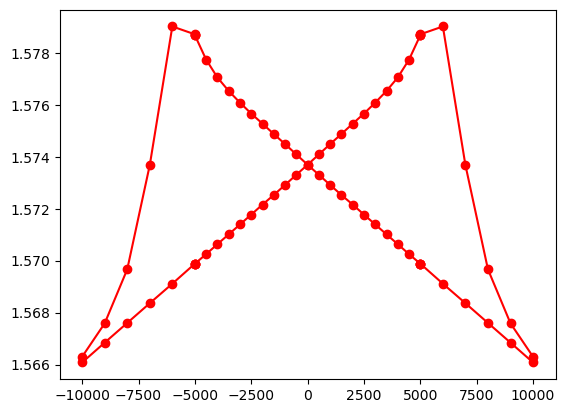

In [105]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')